In [58]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import markers
import os
cm = 1/2.54
############### Un po' di formattazione ################
plt.rcParams["figure.figsize"] = (30*cm, 24*cm)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [59]:
def load_data(filename):
    with open(filename) as f:
        raw = f.readlines()
    
    rates = []
    Pcol = []
    for r in raw[4:]:
        rs = r.split()

        rates.append(float(rs[0]))
        Pcol.append(float(rs[1]))
    return rates,Pcol

In [60]:
files = filter(lambda fn: '.txt'in fn, os.listdir('.'))
results = []
for f in files:
    results.append(load_data(f))

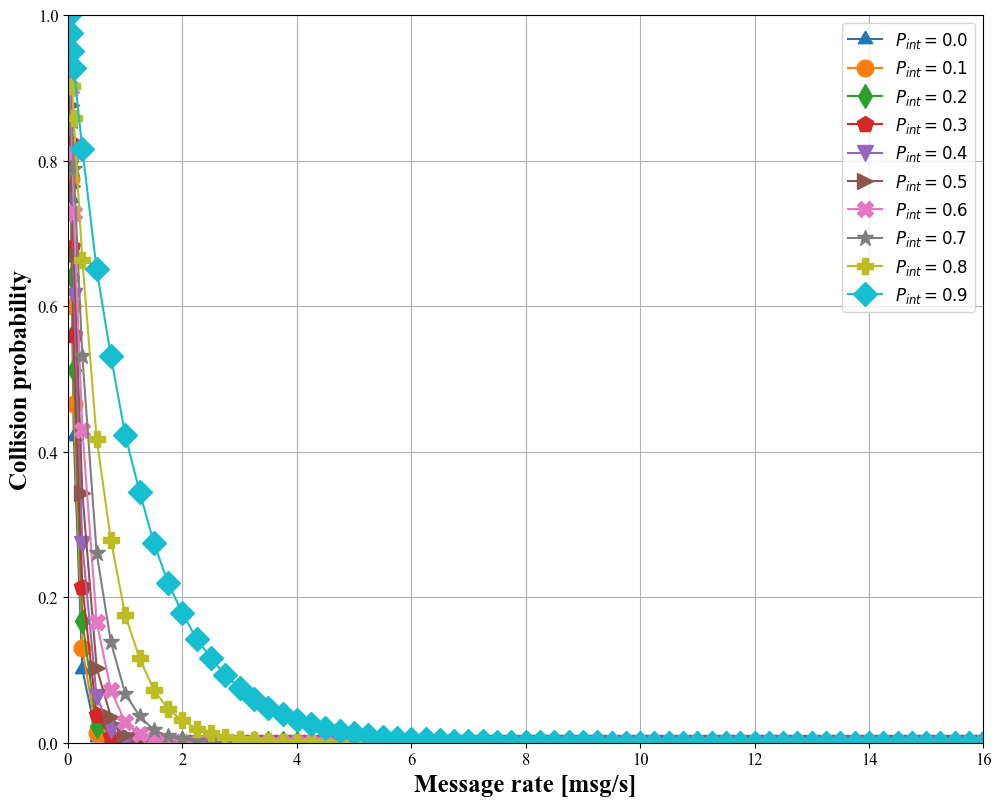

In [62]:
Pint = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
TICKS = [(3, 1),'o','d','p','v','>','X','*','P','D']
for r,pi,m in zip(results,Pint, TICKS):
    plt.plot(r[0],r[1],marker=m,label="$P_{int} = %.1f$"%pi,markersize=12)

plt.ylim(ymax = 1.0,ymin=0)
plt.xlim(xmin=0.0,xmax=16.0)
plt.xlabel("Message rate [msg/s]",fontweight='bold')
plt.ylabel("Collision probability",fontweight='bold')
plt.grid()
plt.legend()
plt.savefig('interf.pdf')
plt.show()
